# Model Summary

Training Directory Contents:
Root: P:\Study\Intership\AICTE Intership\Edunet SHELL Internship\Garbage_classification\data\train
Directories: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Files: []
--------------------
Root: P:\Study\Intership\AICTE Intership\Edunet SHELL Internship\Garbage_classification\data\train\cardboard
Directories: []
Files: ['cardboard1.jpg', 'cardboard10.jpg', 'cardboard100.jpg', 'cardboard101.jpg', 'cardboard102.jpg', 'cardboard103.jpg', 'cardboard104.jpg', 'cardboard105.jpg', 'cardboard106.jpg', 'cardboard107.jpg', 'cardboard108.jpg', 'cardboard109.jpg', 'cardboard11.jpg', 'cardboard110.jpg', 'cardboard111.jpg', 'cardboard112.jpg', 'cardboard113.jpg', 'cardboard114.jpg', 'cardboard115.jpg', 'cardboard116.jpg', 'cardboard117.jpg', 'cardboard118.jpg', 'cardboard119.jpg', 'cardboard12.jpg', 'cardboard120.jpg', 'cardboard121.jpg', 'cardboard122.jpg', 'cardboard123.jpg', 'cardboard124.jpg', 'cardboard125.jpg', 'cardboard126.jpg', 'cardboard127.jpg',

c:\Users\Shahrukesh DM\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.5242 - loss: 1.4548 - val_accuracy: 0.7226 - val_loss: 0.7346 - learning_rate: 3.0000e-04
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7759 - loss: 0.6996 - val_accuracy: 0.8627 - val_loss: 0.4211 - learning_rate: 3.0000e-04
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.8196 - loss: 0.5380 - val_accuracy: 0.9110 - val_loss: 0.2745 - learning_rate: 3.0000e-04
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.8766 - loss: 0.3877 - val_accuracy: 0.9264 - val_loss: 0.2358 - learning_rate: 3.0000e-04
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.8931 - loss: 0.3060 - val_accuracy: 0.9300 - val_loss: 0.1936 - learning_rate: 3.0000e-04
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.9039 - loss: 0.2998 - val_accuracy: 0.9347 - val_loss: 0.2142 - learning_rate: 3.0000e-04
Epoch 7/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9007 

saved


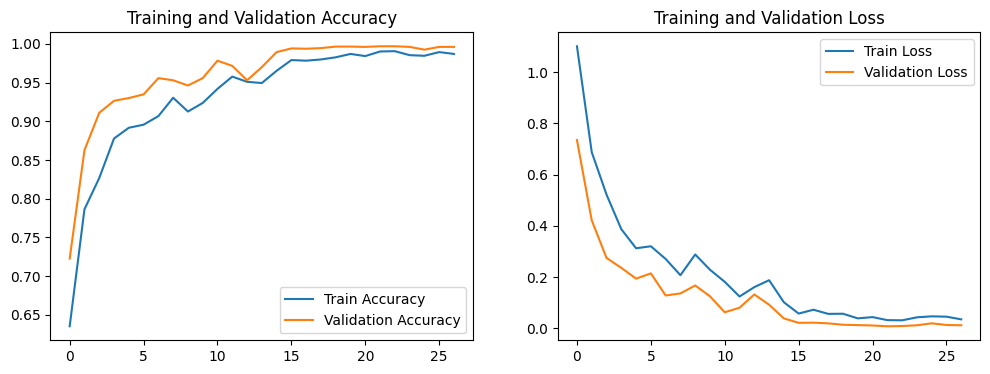

Found 2527 images in P:\Study\Intership\AICTE Intership\Edunet SHELL Internship\Garbage_classification\data\test
Classes: {'metal', 'glass', 'cardboard', 'paper', 'plastic', 'trash'}
Found 2527 validated image filenames belonging to 6 classes.


c:\Users\Shahrukesh DM\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9961 - loss: 0.0100
Final Test Loss: 0.0135
Final Test Accuracy: 99.49%
Final Training Accuracy: 98.69%
Final Validation Accuracy: 99.60%


In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt



# Define Dataset Paths
train_dir = r"P:\Study\Intership\AICTE Intership\Edunet SHELL Internship\Garbage_classification\data\train"
val_dir = r"P:\Study\Intership\AICTE Intership\Edunet SHELL Internship\Garbage_classification\data\val"
test_dir = r"P:\Study\Intership\AICTE Intership\Edunet SHELL Internship\Garbage_classification\data\test"
def create_dataframe(image_dir):
    class_labels = []
    filenames = []

    for root, dirs, files in os.walk(image_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                filenames.append(os.path.relpath(os.path.join(root, file), image_dir))
                class_labels.append(os.path.basename(os.path.dirname(os.path.join(root, file))))

  
    print(f"Found {len(filenames)} images in {image_dir}")
    print(f"Classes: {set(class_labels)}")

    return pd.DataFrame({'filename': filenames, 'class': class_labels})


def print_directory_contents(directory):
    for root, dirs, files in os.walk(directory):
        print(f"Root: {root}")
        print(f"Directories: {dirs}")
        print(f"Files: {files}")
        print("-" * 20)

print("Training Directory Contents:")
print_directory_contents(train_dir)

print("Validation Directory Contents:")
print_directory_contents(val_dir)


train_df = create_dataframe(train_dir)
val_df = create_dataframe(val_dir)


train_df.columns = train_df.columns.str.strip()
val_df.columns = val_df.columns.str.strip()


print("Train DataFrame columns:", train_df.columns)
print("Validation DataFrame columns:", val_df.columns)

print(train_df.head())
print(val_df.head())


print(train_df.dtypes)
print(val_df.dtypes)

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = datagen.flow_from_dataframe(
    train_df, directory=train_dir, x_col="filename", y_col="class",
    target_size=(224, 224), batch_size=32, class_mode="categorical"
)

val_data = datagen.flow_from_dataframe(
    val_df, directory=val_dir, x_col="filename", y_col="class",
    target_size=(224, 224), batch_size=32, class_mode="categorical"
)

num_classes = len(train_data.class_indices)


base_model = InceptionV3(
    weights='imagenet',  
    include_top=False,
    input_shape=(224, 224, 3)
)
for layer in base_model.layers[:200]:  
    layer.trainable = False


model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])


callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
]

history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data,
    callbacks=callbacks
)

model.save("model231.h5")
print("saved")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


test_df = create_dataframe(test_dir)


test_data = datagen.flow_from_dataframe(
    test_df, directory=test_dir, x_col="filename", y_col="class",
    target_size=(224, 224), batch_size=32, class_mode="categorical"
)

final_loss, final_accuracy = model.evaluate(test_data)
print(f"Final Test Loss: {final_loss:.4f}")
print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")


final_train_accuracy = history.history['accuracy'][-1]  
final_val_accuracy = history.history['val_accuracy'][-1] 

print(f"Final Training Accuracy: {final_train_accuracy * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")